In [3]:
!pip install keras==2.12.0

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [10]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'C:\Complete_Content\Navin_HYD\DataSet\DeeplearningDS\cat-dog\training_set',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
    
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'C:\Complete_Content\Navin_HYD\DataSet\DeeplearningDS\cat-dog\test_set',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

    
)


Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# if i want to fast process

In [2]:
model=Sequential()

In [3]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
250/250 [==============================] - 567s 2s/step - loss: 0.7132 - accuracy: 0.5689 - val_loss: 0.6445 - val_accuracy: 0.6460
Epoch 2/2
250/250 [==============================] - 567s 2s/step - loss: 0.6098 - accuracy: 0.6733 - val_loss: 0.6402 - val_accuracy: 0.6515


In [20]:
import matplotlib.pyplot as plt

In [24]:
dog_image=plt.imread(r"C:\Complete_Content\Navin_HYD\DataSet\DeeplearningDS\cat-dog\single_prediction\cat_or_dog_1.jpg")

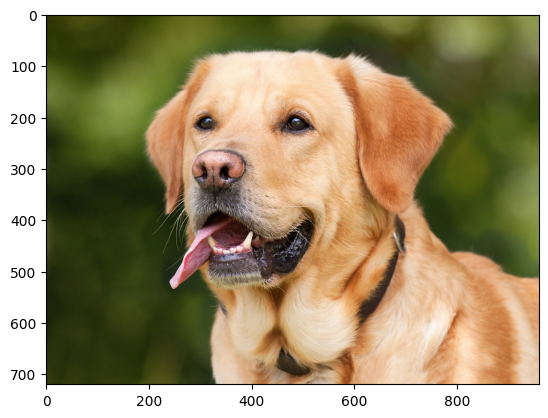

In [25]:
plt.imshow(dog_image)

In [26]:
cat_image=plt.imread(r"C:\Complete_Content\Navin_HYD\DataSet\DeeplearningDS\cat-dog\single_prediction\cat_or_dog_2.jpg")

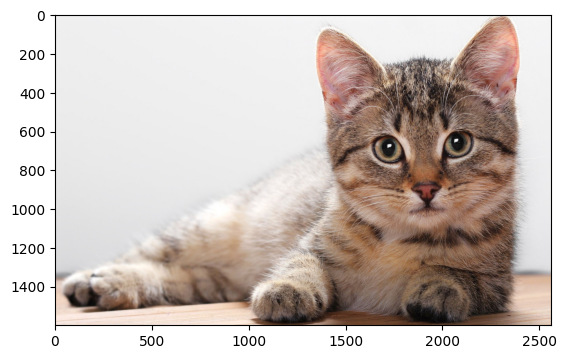

In [27]:
plt.imshow(cat_image)

In [28]:
dog_image.shape

(720, 960, 3)

In [29]:
cat_image.shape

(1600, 2560, 3)

In [30]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [31]:
dog_resize.shape

(256, 256, 3)

In [33]:
cat_resize.shape

(256, 256, 3)

In [34]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [35]:
dog_resize.shape

(1, 256, 256, 3)

In [36]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [39]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 100ms/step


In [38]:
model.predict(cat_resize)

1/1 [==============================] - 0s 104ms/step


array([[0.]], dtype=float32)

In [40]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog
